In [1]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway

In [2]:
#reading csv file
df=pd.read_csv(r"C:\Users\rakhi\Downloads\Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


#### 1. Explain the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
#checking null values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

There is no null values in the data

In [5]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

C:\Users\rakhi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rakhi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rakhi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

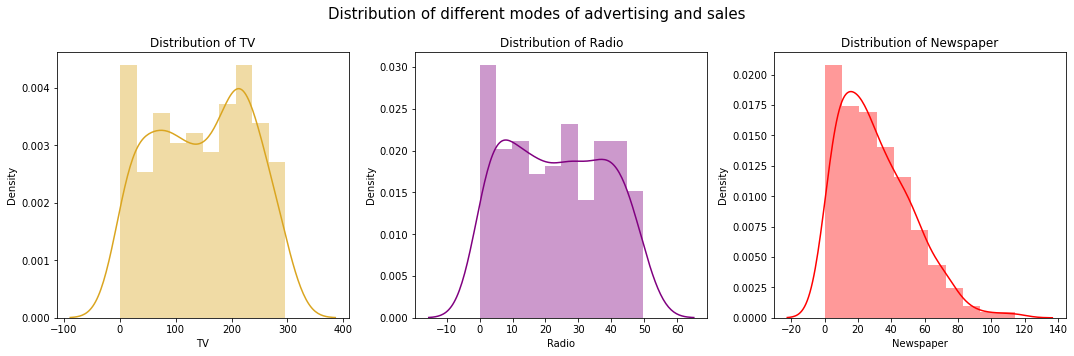

In [6]:
#distribution plot
plt.figure(figsize=(15,5))
plt.suptitle("Distribution of different modes of advertising and sales",fontsize=15)

plt.subplot(131)
sns.distplot(df["TV"],color="goldenrod",bins=10)
plt.title("Distribution of TV",fontsize=12)

plt.subplot(132)
sns.distplot(df["Radio"],color='purple',bins=10)
plt.title("Distribution of Radio",fontsize=12)

plt.subplot(133)
sns.distplot(df["Newspaper"],color='red')
plt.title("Distribution of Newspaper",fontsize=12)

plt.tight_layout()

The distribution of Newspaper advertising is negatively skewed.

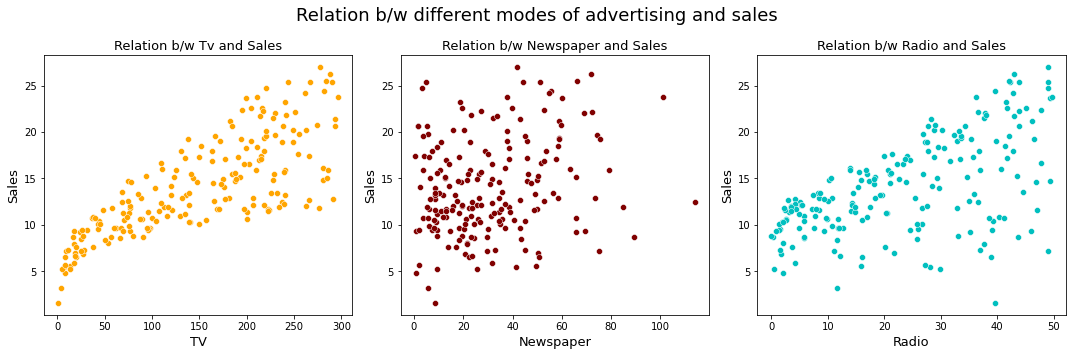

In [7]:
#scatterplot
plt.figure(figsize=(15,5))
plt.suptitle("Relation b/w different modes of advertising and sales",fontsize=18)

plt.subplot(131)
sns.scatterplot(x='TV',y='Sales',data=df,color="orange")
plt.title("Relation b/w Tv and Sales",fontsize=13)
plt.xlabel("TV",fontsize=13)
plt.ylabel("Sales",fontsize=13)

plt.subplot(132)
sns.scatterplot(x='Newspaper',y='Sales',data=df,color="maroon")
plt.title("Relation b/w Newspaper and Sales",fontsize=13)
plt.xlabel("Newspaper",fontsize=13)
plt.ylabel("Sales",fontsize=13)

plt.subplot(133)
sns.scatterplot(x='Radio',y='Sales',data=df,color="c")
plt.title("Relation b/w Radio and Sales",fontsize=13)
plt.xlabel("Radio",fontsize=13)
plt.ylabel("Sales",fontsize=13)

plt.tight_layout()

1. Tv advertising is linearly related to sales.

2. Advertisement through TV is most efficent, followed by Radio.

3. The least efficient is Newspaper advertising.

#### 2. Check the summary statistics and discuss the max, min, avg, median,and percentiles.

In [8]:
df=df.drop(["Unnamed: 0"],axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [9]:
a=df.describe()
a.rename(index={"mean":"average","25%":"25th percentile","50%":"median","75%":"75th percentile"})

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
average,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25th percentile,74.375000,9.975000,12.750000,10.375000
median,149.750000,22.900000,25.750000,12.900000
75th percentile,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

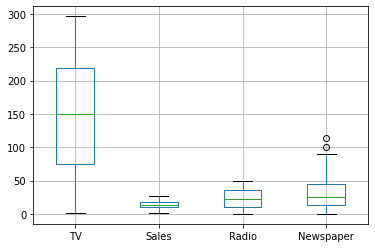

In [10]:
df[['TV','Sales','Radio','Newspaper']].boxplot()

#### 3. The manager wants to find out whether the same amount was spent for the three advertisements (TV , Radio and Newspaper). Comment on your findings.

Here, hypothesis are:

Ho: Same amount were spend for the three advertisements.

H1: Different amounts were spend for the three advertisements.

Since we want to test if there is a significant difference between mean of the three independent groups, we use ANOVA test.

In [11]:
F_value,p_val = stats.f_oneway(df['TV'], df['Radio'],df['Newspaper'])
print("F value =",F_value,"\np value=",p_val)
alpha = 0.05
if p_val >= alpha:
    print("We fail to reject Ho based on the sample.\nSame amount were spend for the three advertisements.")
else:
    print("We reject Ho based on the sample.\nDifferent amounts were spend for the three advertisements.")

F value = 358.8514595342597 
p value= 4.552931539744962e-103
We reject Ho based on the sample.
Different amounts were spend for the three advertisements.
